['Gender', 'Marital Status', 'Residence Type', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits', 'Diagnosis']
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2     3  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    80.0  80.0  73.0  65.0       1.0      298.0         298.0
_______________________________________________
Confusion Matrix: 
 [[80  0  0  0]
 [ 0 80  0  0]
 [ 0  0 73  0]
 [ 0  0  0 65]]

Test Result:
Accuracy Score: 25.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2          3  accuracy   macro avg  \
precision   0.346154   0.175000   0.310345   0.212121      0.25    0.260905   
recall

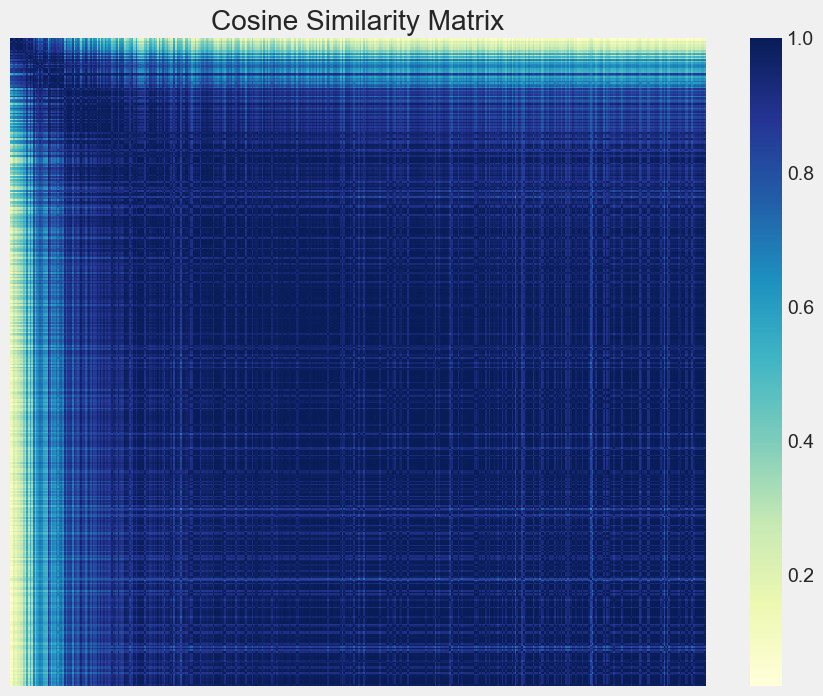

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.tree import DecisionTreeClassifier

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

df = pd.read_csv("../lab3/stroke_prediction_dataset.csv").head(500)

df.dropna(inplace=True)

df.drop('Patient ID', axis=1, inplace=True)
df.drop('Work Type', axis=1, inplace=True)
df.drop('Average Glucose Level', axis=1, inplace=True)
df.drop('Smoking Status', axis=1, inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)

print(categorical_col)

df['Alcohol Intake'] = df['Alcohol Intake'].astype("category").cat.codes

categorical_col.remove('Alcohol Intake')

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

dataset = df.drop('Alcohol Intake', axis=1)
for column in dataset:
    if dataset[column].dtype == 'object':
        dataset[column] = pd.factorize(dataset[column])[0]

X = dataset
y = df['Alcohol Intake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train == False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

print("Shape of the dataset is: ", X.shape)
similarity_matrix = cosine_similarity(X)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Matrix")
plt.show()